In [2]:
import pandas as pd
import numpy as np
import string

In [54]:
df=pd.read_csv('C:\\Users\\Sushant\\Downloads\\63711_124070_bundle_archive\\SCMS_Delivery_History_Dataset.csv')


In [4]:
pd.set_option('display.max_columns', None)
df.head(20)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,Generic,10mg/ml,Oral solution,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,Pre-PQ Process,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,ARV,Pediatric,MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...,"Efavirenz 200mg [Stocrin/Sustiva], capsule, 90...",Efavirenz,Stocrin/Sustiva,200mg,Capsule,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,7-Dec-06,7-Dec-06,7-Dec-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,11/13/06,30-Jan-07,30-Jan-07,30-Jan-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,

In [5]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
#print(round(df['Line Item Insurance (USD)'].mean(),2))

df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(value=round(df['Line Item Insurance (USD)'].mean(),2))
df['Line Item Insurance (USD)'].head()

0    240.12
1    240.12
2    240.12
3    240.12
4    240.12
Name: Line Item Insurance (USD), dtype: float64

In [9]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117692
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,493.188408
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,7.030000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,52.940000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# Working on variable: Weight (kilograms)

In [55]:
#For Weight (kilograms)
for i in range(len(df)):
    x = df.iloc[i,-3:-2].values
    if x[0].isnumeric():
        df.iloc[i,-3:-2] = float(x[0])
    else:
        df.iloc[i,-3:-2] = np.nan
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [56]:
df['Weight (Kilograms)'].isna().sum()

3952

In [57]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(value=round(df['Weight (Kilograms)'].mean(),2))
df['Weight (Kilograms)'].tail()

10319    3424.44
10320    3424.44
10321    3424.44
10322    1392.00
10323    3424.44
Name: Weight (Kilograms), dtype: float64

# Working on Variable: Freight Cost

In [58]:
df.iloc[i,-2:-1]

Freight Cost (USD)    Freight Included in Commodity Cost
Name: 10323, dtype: object

In [59]:
#For Freight Cost (USD)
for i in range(len(df)):
    x = df.iloc[i,-2:-1].values
    try:
        x[0]= float(x[0])   
    except:
        x[0] = np.nan
    df.iloc[i,-2:-1] = x[0]
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(value=round(df['Freight Cost (USD)'].mean(),2))
df['Freight Cost (USD)'].tail()

10319    11103.23
10320    11103.23
10321    11103.23
10322    11103.23
10323    11103.23
Name: Freight Cost (USD), dtype: float64

# Working on Variable:Dosage 

In [61]:
#Dosage
df['Dosage'].head()

0        NaN
1    10mg/ml
2        NaN
3      150mg
4       30mg
Name: Dosage, dtype: object

In [62]:
print(df.Dosage)

0                    NaN
1                10mg/ml
2                    NaN
3                  150mg
4                   30mg
5                10mg/ml
6                  200mg
7                  200mg
8                   30mg
9               200/50mg
10              200/50mg
11                   NaN
12                   NaN
13             150/300mg
14                   NaN
15                 200mg
16                   NaN
17                   NaN
18                    2g
19                   NaN
20                   NaN
21                 200mg
22               10mg/ml
23              200/50mg
24                   NaN
25                   NaN
26                   NaN
27                   NaN
28                   NaN
29                  30mg
30                   NaN
31               10mg/ml
32                 300mg
33                 300mg
34                   NaN
35                   NaN
36                1mg/ml
37                   NaN
38                   NaN
39                   NaN


# Working with dates

In [63]:
df['Scheduled Delivery Date'].head()

0     2-Jun-06
1    14-Nov-06
2    27-Aug-06
3     1-Sep-06
4    11-Aug-06
Name: Scheduled Delivery Date, dtype: object

In [64]:
# #from datetime import datetime
# pd.datetime(df['Scheduled Delivery Date'],format='%d-%b-%y',)

In [65]:
import datetime as dt 
df['Scheduled Delivery Date'] = df['Scheduled Delivery Date'].apply(lambda x: dt.datetime.strptime(x,'%d-%b-%y'))
df['Scheduled Delivery Date'].head()

0   2006-06-02
1   2006-11-14
2   2006-08-27
3   2006-09-01
4   2006-08-11
Name: Scheduled Delivery Date, dtype: datetime64[ns]

In [120]:
data = df[['Brand','Vendor','Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)','Pack Price','Unit Price']].copy()

In [121]:
data.head()

,Brand,Vendor,Shipment Mode,Country,Freight Cost (USD),Weight (Kilograms),Pack Price,Unit Price
0,Reveal,RANBAXY Fine Chemicals LTD.,Air,Côte d'Ivoire,780.34,13.0,29.00,0.97
1,Generic,Aurobindo Pharma Limited,Air,Vietnam,4521.50,358.0,6.20,0.03
2,Determine,Abbott GmbH & Co. KG,Air,Côte d'Ivoire,1653.78,171.0,80.00,0.80
3,Generic,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Air,Vietnam,16007.06,1855.0,3.99,0.07
4,Generic,Aurobindo Pharma Limited,Air,Vietnam,45450.08,7590.0,3.20,0.05


In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
import seaborn as sns
sns.set_style('darkgrid')

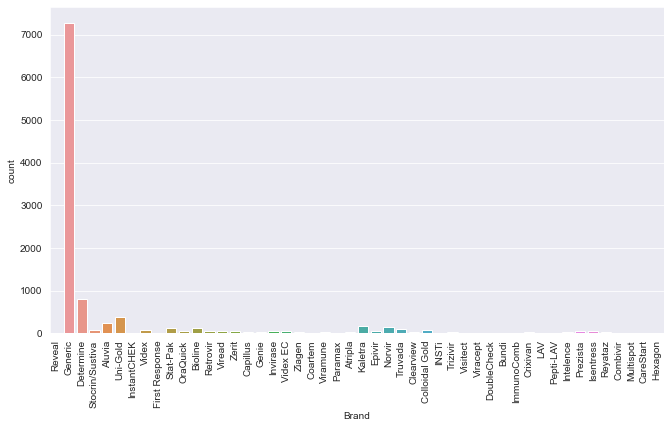

In [124]:
plt.figure(figsize=(11,6))
plt.xticks(rotation = 90)
sns.countplot(data['Brand'],data=data)

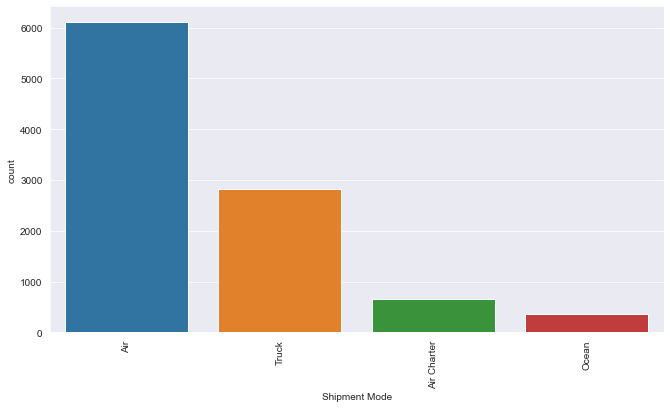

In [92]:
plt.figure(figsize=(11,6))
plt.xticks(rotation = 90)
sns.countplot(data['Shipment Mode'],data=data)

In [125]:
data = pd.get_dummies(data,columns=['Shipment Mode','Country','Brand','Vendor'])

In [126]:
data.shape

(10324, 172)

In [127]:
data.head()

,Freight Cost (USD),Weight (Kilograms),Pack Price,Unit Price,Shipment Mode_Air,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Country_Afghanistan,Country_Angola,Country_Belize,Country_Benin,Country_Botswana,Country_Burkina Faso,Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Dominican Republic,Country_Ethiopia,Country_Ghana,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Malawi,Country_Mali,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Pakistan,Country_Rwanda,Country_Senegal,Country_Sierra Leone,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Swaziland,Country_Tanzania,Country_Togo,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Brand_Aluvia,Brand_Atripla,Brand_Bioline,Brand_Bundi,Brand_Capillus,Brand_CareStart,Brand_Clearview,Brand_Coartem,Brand_Colloidal Gold,Brand_Combivir,Brand_Crixivan,Brand_Determine,Brand_DoubleCheck,Brand_Epivir,Brand_First Response,Brand_Generic,Brand_Genie,Brand_Hexagon,Brand_INSTi,Brand_ImmunoComb,Brand_InstantCHEK,Brand_Intelence,Brand_Invirase,Brand_Isentress,Brand_Kaletra,Brand_LAV,Brand_Multispot,Brand_Norvir,Brand_OraQuick,Brand_Paramax,Brand_Pepti-LAV,Brand_Prezista,Brand_Retrovir,Brand_Reveal,Brand_Reyataz,Brand_Stat-Pak,Brand_Stocrin/Sustiva,Brand_Trizivir,Brand_Truvada,Brand_Uni-Gold,Brand_Videx,Brand_Videx EC,Brand_Viracept,Brand_Viramune,Brand_Viread,Brand_Visitect,Brand_Zerit,Brand_Ziagen,Vendor_ABBOTT LABORATORIES (PUERTO RICO),Vendor_ABBOTT LOGISTICS B.V.,Vendor_ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Vendor_ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)","Vendor_ACCESS BIO, INC.",Vendor_ACCOUN NIGERIA LIMITED,Vendor_ACOUNS NIGERIA LTD,Vendor_ACTION MEDEOR E.V.,Vendor_AHN (PTY) LTD (AKA UCB (S.A.),Vendor_AMSTELFARMA B.V.,Vendor_ASPEN PHARMACARE,Vendor_AUROBINDO PHARAM (SOUTH AFRICA),Vendor_Abbott GmbH & Co. KG,Vendor_Aurobindo Pharma Limited,Vendor_B&C GROUP S.A.,Vendor_BIO-RAD LABORATORIES (FRANCE),Vendor_BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA),Vendor_BIOLYTICAL LABORATORIES INC.,Vendor_BRISTOL-MYERS SQUIBB,Vendor_BUNDI INTERNATIONAL DIAGNOSTICS LTD,Vendor_CENTRAL PHARMACEUTICAL COMPANY NO. 1,"Vendor_CHEMBIO DIAGNOSTIC SYSTEMS, INC.",Vendor_CIPLA LIMITED,Vendor_EMCURE PHARMACEUTICALS LTD,Vendor_ETHNOR DEL ISTMO S.A.,Vendor_EY Laboratories,"Vendor_GILEAD SCIENCES IRELAND, INC.",Vendor_GLAXOSMITHKLINE EXPORT LIMITED,Vendor_HETERO LABS LIMITED,Vendor_HUMAN GMBH,Vendor_Hoffmann-La Roche ltd Basel,Vendor_IDA FOUNDATION,Vendor_IDIS LIMITED,Vendor_IMRES B.V.,Vendor_INTERNATIONAL HEALTHCARE DISTRIBUTORS,Vendor_INVERNESS MEDICAL INNOVATIONS HONG KONG LTD,Vendor_INVERNESS MEDICAL INNOVATIONS SOUTH AFRICA (PTY) LTD,Vendor_JANSSEN SCIENCES IRELAND UC (FORMERLY JANSSEN R&D IRELAND),"Vendor_JSI R&T INSTITUTE, INC.",Vendor_KAS MEDICS LIMITED,Vendor_LAWRENCE LABORATORIES (SUBSIDIARY OF BRISTOL MYERS SQUIBB),Vendor_MEDMIRA EAST AFRICA LTD.,Vendor_MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.),Vendor_MICRO LABS LIMITED,Vendor_MISSIONPHARMA A/S,"Vendor_MSD LATIN AMERICA SERVICES, S. DE R.L. DE C.V.",Vendor_MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),Vendor_NOVARTIS PHARMA SERVICES AG,Vendor_OMEGA DIAGNOSTICS LTD,Vendor_Orasure Technologies Inc.,"Vendor_Orgenics, Ltd",Vendor_PHARMACY DIRECT,Vendor_PLURIPHARM S.A.,"Vendor_PUETRO RICO PHARMACEUTICAL, INC.",Vendor_Premier Medical Corporation Ltd.,"Vendor_RAININ INSTRUMENT, LLC.",Vendor_RANBAXY Fine Chemicals LTD.,Vendor_REINBOLD EXPORT IMPORT,Vendor_S. BUYS WHOLESALER,Vendor_SCMS from RDC,Vendor_SETEMA LIMITED PLC,"Vendor_SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)",Vendor_STRIDES ARCOLAB LIMITED,Vendor_SUB-SAHARAN BIOMEDICAL P.L.C.,Vendor_SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED),Vendor_SWORDS LABORATORIES,Vendor_SYSMEX AMERICA INC,"Vendor_Standar

In [128]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data.corr())

In [129]:
# #normalize data
# def normalization(x):
#     norm = (x -min(x))/(max(x)-min(x))
#     return norm

In [130]:
# data['Freight Cost (USD)'] = normalization(data['Freight Cost (USD)'])
# data['Weight (Kilograms)'] = normalization(data['Weight (Kilograms)'])
# data['Pack Price'] = normalization(data['Pack Price'])
# data['Unit Price'] = normalization(data['Unit Price'])
data.head()

,Freight Cost (USD),Weight (Kilograms),Pack Price,Unit Price,Shipment Mode_Air,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Country_Afghanistan,Country_Angola,Country_Belize,Country_Benin,Country_Botswana,Country_Burkina Faso,Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Dominican Republic,Country_Ethiopia,Country_Ghana,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Malawi,Country_Mali,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Pakistan,Country_Rwanda,Country_Senegal,Country_Sierra Leone,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Swaziland,Country_Tanzania,Country_Togo,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Brand_Aluvia,Brand_Atripla,Brand_Bioline,Brand_Bundi,Brand_Capillus,Brand_CareStart,Brand_Clearview,Brand_Coartem,Brand_Colloidal Gold,Brand_Combivir,Brand_Crixivan,Brand_Determine,Brand_DoubleCheck,Brand_Epivir,Brand_First Response,Brand_Generic,Brand_Genie,Brand_Hexagon,Brand_INSTi,Brand_ImmunoComb,Brand_InstantCHEK,Brand_Intelence,Brand_Invirase,Brand_Isentress,Brand_Kaletra,Brand_LAV,Brand_Multispot,Brand_Norvir,Brand_OraQuick,Brand_Paramax,Brand_Pepti-LAV,Brand_Prezista,Brand_Retrovir,Brand_Reveal,Brand_Reyataz,Brand_Stat-Pak,Brand_Stocrin/Sustiva,Brand_Trizivir,Brand_Truvada,Brand_Uni-Gold,Brand_Videx,Brand_Videx EC,Brand_Viracept,Brand_Viramune,Brand_Viread,Brand_Visitect,Brand_Zerit,Brand_Ziagen,Vendor_ABBOTT LABORATORIES (PUERTO RICO),Vendor_ABBOTT LOGISTICS B.V.,Vendor_ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Vendor_ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)","Vendor_ACCESS BIO, INC.",Vendor_ACCOUN NIGERIA LIMITED,Vendor_ACOUNS NIGERIA LTD,Vendor_ACTION MEDEOR E.V.,Vendor_AHN (PTY) LTD (AKA UCB (S.A.),Vendor_AMSTELFARMA B.V.,Vendor_ASPEN PHARMACARE,Vendor_AUROBINDO PHARAM (SOUTH AFRICA),Vendor_Abbott GmbH & Co. KG,Vendor_Aurobindo Pharma Limited,Vendor_B&C GROUP S.A.,Vendor_BIO-RAD LABORATORIES (FRANCE),Vendor_BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA),Vendor_BIOLYTICAL LABORATORIES INC.,Vendor_BRISTOL-MYERS SQUIBB,Vendor_BUNDI INTERNATIONAL DIAGNOSTICS LTD,Vendor_CENTRAL PHARMACEUTICAL COMPANY NO. 1,"Vendor_CHEMBIO DIAGNOSTIC SYSTEMS, INC.",Vendor_CIPLA LIMITED,Vendor_EMCURE PHARMACEUTICALS LTD,Vendor_ETHNOR DEL ISTMO S.A.,Vendor_EY Laboratories,"Vendor_GILEAD SCIENCES IRELAND, INC.",Vendor_GLAXOSMITHKLINE EXPORT LIMITED,Vendor_HETERO LABS LIMITED,Vendor_HUMAN GMBH,Vendor_Hoffmann-La Roche ltd Basel,Vendor_IDA FOUNDATION,Vendor_IDIS LIMITED,Vendor_IMRES B.V.,Vendor_INTERNATIONAL HEALTHCARE DISTRIBUTORS,Vendor_INVERNESS MEDICAL INNOVATIONS HONG KONG LTD,Vendor_INVERNESS MEDICAL INNOVATIONS SOUTH AFRICA (PTY) LTD,Vendor_JANSSEN SCIENCES IRELAND UC (FORMERLY JANSSEN R&D IRELAND),"Vendor_JSI R&T INSTITUTE, INC.",Vendor_KAS MEDICS LIMITED,Vendor_LAWRENCE LABORATORIES (SUBSIDIARY OF BRISTOL MYERS SQUIBB),Vendor_MEDMIRA EAST AFRICA LTD.,Vendor_MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.),Vendor_MICRO LABS LIMITED,Vendor_MISSIONPHARMA A/S,"Vendor_MSD LATIN AMERICA SERVICES, S. DE R.L. DE C.V.",Vendor_MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),Vendor_NOVARTIS PHARMA SERVICES AG,Vendor_OMEGA DIAGNOSTICS LTD,Vendor_Orasure Technologies Inc.,"Vendor_Orgenics, Ltd",Vendor_PHARMACY DIRECT,Vendor_PLURIPHARM S.A.,"Vendor_PUETRO RICO PHARMACEUTICAL, INC.",Vendor_Premier Medical Corporation Ltd.,"Vendor_RAININ INSTRUMENT, LLC.",Vendor_RANBAXY Fine Chemicals LTD.,Vendor_REINBOLD EXPORT IMPORT,Vendor_S. BUYS WHOLESALER,Vendor_SCMS from RDC,Vendor_SETEMA LIMITED PLC,"Vendor_SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)",Vendor_STRIDES ARCOLAB LIMITED,Vendor_SUB-SAHARAN BIOMEDICAL P.L.C.,Vendor_SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED),Vendor_SWORDS LABORATORIES,Vendor_SYSMEX AMERICA INC,"Vendor_Standar

In [131]:
X = data.drop('Unit Price',axis=1) 
y = data['Unit Price']

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Linear regression

In [146]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

# print the intercept
print(lm.intercept_)

9.494405302267687


In [147]:
pd.set_option('display.max_rows', None)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Freight Cost (USD),4.704805e-07
Weight (Kilograms),3.877433e-07
Pack Price,-7.089159e-03
Shipment Mode_Air,-7.940070e-02
Shipment Mode_Air Charter,-5.508935e-02
Shipment Mode_Ocean,-6.930564e-02
Shipment Mode_Truck,-6.277518e-02
Country_Afghanistan,1.512793e-01
Country_Angola,-1.681217e-01
Country_Belize,-2.470178e-01


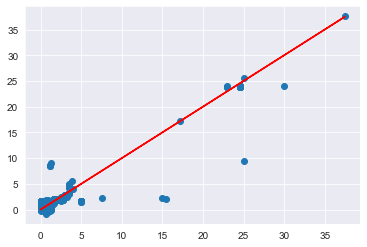

In [148]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [155]:
from sklearn.metrics import classification_report

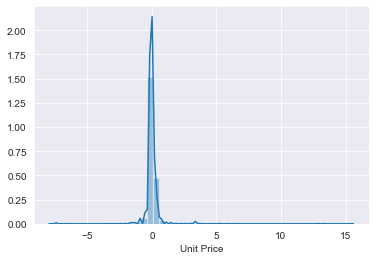

In [137]:
sns.distplot((y_test-predictions),bins=50);

In [157]:
from sklearn import metrics
print('RSquare:',metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RSquare: 0.9182165452513841
MAE: 0.22685011930641186
MSE: 0.5483275381959848
RMSE: 0.7404914166929856


In [168]:
import statsmodels.api as sm
#X = sm.add_constant(X.ravel())
results = sm.OLS(y,X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2412.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:02:25   Log-Likelihood:                -8022.5
No. Observations:               10324   AIC:                         1.637e+04
Df Residuals:                   10164   BIC:                         1.752e+04
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Freight Cost (USD)                                                         1.33e-06   4.71e-07      2.827      0.005    4.08e-07    2.25e-06
Weight (Kilograms)                                                        3.221e-07   5.35e-07      0.603      0.547   -7.26e-07    1.37e-06
Pack Price                                                                  -0.0081      0.000    -23.556      0.000      -0.009      -0.007
Shipment Mode_Air                                                           -0.0874      0.033     -2.624      0.009      -0.153      -0.022
Shipment Mode_Air Charter                                                   -0.0622      0.043     -1.449      0.147      -0.146       0.022
Shipment Mode_Ocean                                                         -0.0786      0.052     -1.508      0.132      -0.181       0.024
Shipment Mode_Truck                                                         -0.0717      0.034     -2.136      0.033      -0.138      -0.006
Country_Afghanistan                                                          3.6941      0.385      9.604      0.000       2.940       4.448
Country_Angola                                                               3.5695      0.201     17.741      0.000       3.175       3.964
Country_Belize                                                               3.4745      0.524      6.628      0.000       2.447       4.502
Country_Benin                                                                3.6218      0.149     24.277      0.000       3.329       3.914
Country_Botswana                                                             4.3255      0.073     59.455      0.000       4.183       4.468
Country_Burkina Faso                                                         3.3961      0.372      9.119      0.000       2.666       4.126
Country_Burundi                                                              3.5732      0.064     56.162      0.000       3.448       3.698
Country_Cameroon                                                             3.6130      0.071     50.721      0.000       3.473       3.753
Country_Congo, DRC                                                           3.6385      0.044     82.396      0.000       3.552       3.725
Country_Côte d'Ivoire                                                        3.6504      0.037     99.115      0.000       3.578       3.723
Country_Dominican Republic                                                   3.7725      0.083     45.289      0.000       3.609       3.936
Country_Ethiopia                                                             3.5372      0.050     71.250      0.000      

In [165]:
with open('lm_summary.csv', 'w') as fh:
    fh.write(results.summary().as_csv())

# Using Randomforest

In [90]:
# from sklearn.ensemble import RandomForestRegressor 

In [91]:
# rfr = RandomForestRegressor()

In [92]:
# rfr.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
# pred = rfr.predict(X_test)

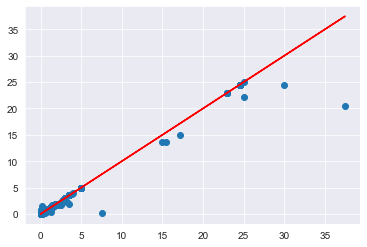

In [96]:
# plt.scatter(y_test,pred)
# plt.plot(y_test,y_test,'r')

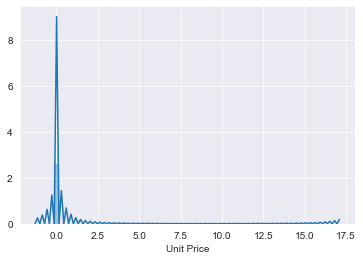

In [97]:
# sns.distplot((y_test-pred),bins=50);

In [98]:
# print('MAE:', metrics.mean_absolute_error(y_test, pred))
# print('MSE:', metrics.mean_squared_error(y_test, pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.03956184795515942
MSE: 0.197320370239332
RMSE: 0.4442075756212764


# KNN

In [162]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [163]:
predn = knn.predict(X_test)

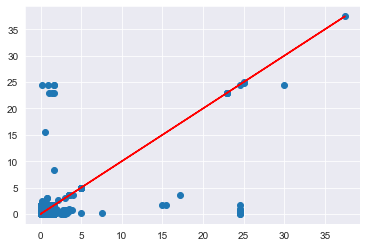

In [107]:
# plt.scatter(y_test,predn)
# plt.plot(y_test,y_test,'r')

In [164]:
print('RSquare:',metrics.r2_score(y_test, predn))
print('MAE:', metrics.mean_absolute_error(y_test, predn))
print('MSE:', metrics.mean_squared_error(y_test, predn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predn)))

RSquare: 0.1825403924497664
MAE: 0.44510411622276036
MSE: 5.480761549636804
RMSE: 2.3411026354341673


# SVR

RSquare: -0.013872352189746362
MAE: 0.5680394130938046
MSE: 6.797635690861846
RMSE: 2.6072275870859154


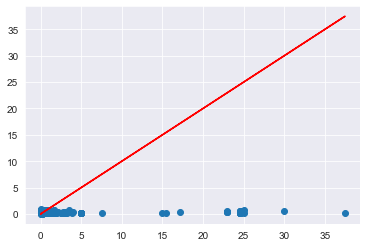

In [161]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train,y_train)

predsvr = svr.predict(X_test)

plt.scatter(y_test,predsvr)
plt.plot(y_test,y_test,'r')

print('RSquare:',metrics.r2_score(y_test, predsvr))
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))